In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint.csv'
model_save_path = 'model/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 7

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/22 [==============================] - 1s 12ms/step - loss: 2.1848 - accuracy: 0.1315 - val_loss: 1.9163 - val_accuracy: 0.1160

Epoch 00001: saving model to model\keypoint_classifier.hdf5
Epoch 2/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.9010 - accuracy: 0.1975 - val_loss: 1.7855 - val_accuracy: 0.4343

Epoch 00002: saving model to model\keypoint_classifier.hdf5
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.7682 - accuracy: 0.3036 - val_loss: 1.6538 - val_accuracy: 0.4409

Epoch 00003: saving model to model\keypoint_classifier.hdf5
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 1.6258 - accuracy: 0.3839 - val_loss: 1.5256 - val_accuracy: 0.4287

Epoch 00004: saving model to model\keypoint_classifier.hdf5
Epoch 5/1000
22/22 [==============================] - 0s 5ms/step - loss: 1.5237 - accuracy: 0.4285 - val_loss: 1.4317 - val_accuracy: 0.4387

Epoch 00005: saving model to model\keypoint_

22/22 [==============================] - 0s 4ms/step - loss: 0.6011 - accuracy: 0.7745 - val_loss: 0.2675 - val_accuracy: 0.9624

Epoch 00041: saving model to model\keypoint_classifier.hdf5
Epoch 42/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.7889 - val_loss: 0.2538 - val_accuracy: 0.9613

Epoch 00042: saving model to model\keypoint_classifier.hdf5
Epoch 43/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.5446 - accuracy: 0.7870 - val_loss: 0.2456 - val_accuracy: 0.9514

Epoch 00043: saving model to model\keypoint_classifier.hdf5
Epoch 44/1000
22/22 [==============================] - 0s 9ms/step - loss: 0.5407 - accuracy: 0.7911 - val_loss: 0.2389 - val_accuracy: 0.9735

Epoch 00044: saving model to model\keypoint_classifier.hdf5
Epoch 45/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.7874 - val_loss: 0.2363 - val_accuracy: 0.9536

Epoch 00045: saving model to model\keypoint_classifier

22/22 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8250 - val_loss: 0.1519 - val_accuracy: 0.9790

Epoch 00081: saving model to model\keypoint_classifier.hdf5
Epoch 82/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8254 - val_loss: 0.1544 - val_accuracy: 0.9724

Epoch 00082: saving model to model\keypoint_classifier.hdf5
Epoch 83/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.8290 - val_loss: 0.1512 - val_accuracy: 0.9845

Epoch 00083: saving model to model\keypoint_classifier.hdf5
Epoch 84/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.8231 - val_loss: 0.1491 - val_accuracy: 0.9845

Epoch 00084: saving model to model\keypoint_classifier.hdf5
Epoch 85/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4260 - accuracy: 0.8324 - val_loss: 0.1439 - val_accuracy: 0.9757

Epoch 00085: saving model to model\keypoint_classifier

22/22 [==============================] - 0s 7ms/step - loss: 0.3874 - accuracy: 0.8515 - val_loss: 0.1138 - val_accuracy: 0.9923

Epoch 00121: saving model to model\keypoint_classifier.hdf5
Epoch 122/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.3806 - accuracy: 0.8596 - val_loss: 0.1099 - val_accuracy: 0.9923

Epoch 00122: saving model to model\keypoint_classifier.hdf5
Epoch 123/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.3668 - accuracy: 0.8545 - val_loss: 0.1037 - val_accuracy: 0.9923

Epoch 00123: saving model to model\keypoint_classifier.hdf5
Epoch 124/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8585 - val_loss: 0.1085 - val_accuracy: 0.9923

Epoch 00124: saving model to model\keypoint_classifier.hdf5
Epoch 125/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3583 - accuracy: 0.8585 - val_loss: 0.1063 - val_accuracy: 0.9923

Epoch 00125: saving model to model\keypoint_classi

22/22 [==============================] - 0s 4ms/step - loss: 0.3261 - accuracy: 0.8718 - val_loss: 0.0903 - val_accuracy: 0.9945

Epoch 00161: saving model to model\keypoint_classifier.hdf5
Epoch 162/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8648 - val_loss: 0.0843 - val_accuracy: 0.9956

Epoch 00162: saving model to model\keypoint_classifier.hdf5
Epoch 163/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.3303 - accuracy: 0.8740 - val_loss: 0.0879 - val_accuracy: 0.9956

Epoch 00163: saving model to model\keypoint_classifier.hdf5
Epoch 164/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.3181 - accuracy: 0.8766 - val_loss: 0.0891 - val_accuracy: 0.9923

Epoch 00164: saving model to model\keypoint_classifier.hdf5
Epoch 165/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3341 - accuracy: 0.8696 - val_loss: 0.0884 - val_accuracy: 0.9934

Epoch 00165: saving model to model\keypoint_classi

22/22 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8847 - val_loss: 0.0761 - val_accuracy: 0.9945

Epoch 00201: saving model to model\keypoint_classifier.hdf5
Epoch 202/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3167 - accuracy: 0.8736 - val_loss: 0.0782 - val_accuracy: 0.9945

Epoch 00202: saving model to model\keypoint_classifier.hdf5
Epoch 203/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8769 - val_loss: 0.0763 - val_accuracy: 0.9945

Epoch 00203: saving model to model\keypoint_classifier.hdf5
Epoch 204/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8865 - val_loss: 0.0795 - val_accuracy: 0.9945

Epoch 00204: saving model to model\keypoint_classifier.hdf5
Epoch 205/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.8766 - val_loss: 0.0798 - val_accuracy: 0.9945

Epoch 00205: saving model to model\keypoint_classi

22/22 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.8751 - val_loss: 0.0738 - val_accuracy: 0.9945

Epoch 00241: saving model to model\keypoint_classifier.hdf5
Epoch 242/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8836 - val_loss: 0.0750 - val_accuracy: 0.9945

Epoch 00242: saving model to model\keypoint_classifier.hdf5
Epoch 243/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2772 - accuracy: 0.8994 - val_loss: 0.0691 - val_accuracy: 0.9945

Epoch 00243: saving model to model\keypoint_classifier.hdf5
Epoch 244/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2785 - accuracy: 0.8913 - val_loss: 0.0733 - val_accuracy: 0.9945

Epoch 00244: saving model to model\keypoint_classifier.hdf5
Epoch 245/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.8810 - val_loss: 0.0729 - val_accuracy: 0.9945

Epoch 00245: saving model to model\keypoint_classi

Epoch 281/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.2765 - accuracy: 0.8920 - val_loss: 0.0720 - val_accuracy: 0.9945

Epoch 00281: saving model to model\keypoint_classifier.hdf5
Epoch 282/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.8935 - val_loss: 0.0722 - val_accuracy: 0.9945

Epoch 00282: saving model to model\keypoint_classifier.hdf5
Epoch 283/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2742 - accuracy: 0.8968 - val_loss: 0.0692 - val_accuracy: 0.9945

Epoch 00283: saving model to model\keypoint_classifier.hdf5
Epoch 284/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 0.8928 - val_loss: 0.0673 - val_accuracy: 0.9945

Epoch 00284: saving model to model\keypoint_classifier.hdf5
Epoch 285/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.8928 - val_loss: 0.0738 - val_accuracy: 0.9945

Epoch 00285: saving model to model\

22/22 [==============================] - 0s 4ms/step - loss: 0.2896 - accuracy: 0.8887 - val_loss: 0.0710 - val_accuracy: 0.9945

Epoch 00321: saving model to model\keypoint_classifier.hdf5
Epoch 322/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2828 - accuracy: 0.8917 - val_loss: 0.0755 - val_accuracy: 0.9945

Epoch 00322: saving model to model\keypoint_classifier.hdf5
Epoch 323/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2786 - accuracy: 0.8946 - val_loss: 0.0732 - val_accuracy: 0.9945

Epoch 00323: saving model to model\keypoint_classifier.hdf5
Epoch 324/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.8957 - val_loss: 0.0657 - val_accuracy: 0.9945

Epoch 00324: saving model to model\keypoint_classifier.hdf5
Epoch 325/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2621 - accuracy: 0.8917 - val_loss: 0.0685 - val_accuracy: 0.9945

Epoch 00325: saving model to model\keypoint_classi

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9945


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.34950300e-04 3.98647188e-07 3.46098932e-06 2.84600361e-08
 9.84427392e-01 1.53897881e-10 1.54338265e-02]
4


# Confusion matrix

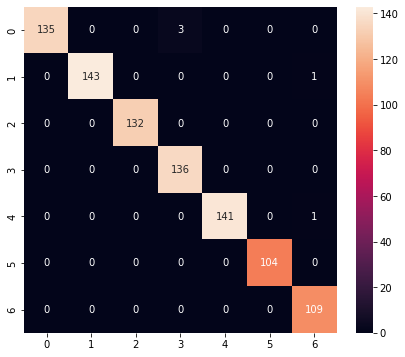

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       138
           1       1.00      0.99      1.00       144
           2       1.00      1.00      1.00       132
           3       0.98      1.00      0.99       136
           4       1.00      0.99      1.00       142
           5       1.00      1.00      1.00       104
           6       0.98      1.00      0.99       109

    accuracy                           0.99       905
   macro avg       0.99      0.99      0.99       905
weighted avg       0.99      0.99      0.99       905



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmp2ae5h6mc\assets


6480

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1.13 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.6895572e-04 9.7922486e-01 2.7073230e-04 2.0335395e-02]
1
